In [1]:
import flask
print(flask.__version__)

1.1.2


In [2]:
# Check tensorflow version and GPU availability
import tensorflow as tf
print('tf version:', tf.__version__)
print('gpu:', tf.config.list_physical_devices('GPU'))

tf version: 2.6.0
gpu: []


In [3]:
IMG_DIMEN = 224
N_COLORS = 3   

In [4]:
import cv2
import numpy as np

def read_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, dsize=(IMG_DIMEN, IMG_DIMEN))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32')/255.0
    return img

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    plt.figure(figsize=(6, 6))
    if N_COLORS == 3:
        plt.imshow(img)
    elif N_COLORS == 1:
         plt.imshow(img, cmap='gray')
    plt.show()

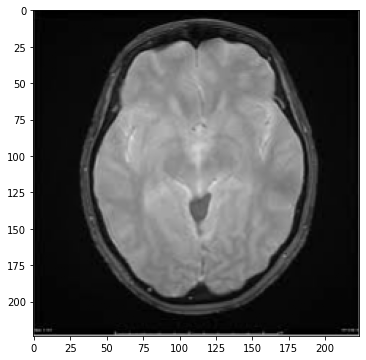

In [6]:
img = read_image('C:/Users/Menna Barhoma/project/brain-cancer-cnn/data/Training/no_tumor/image (70).jpg')
imshow(img)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

model = Sequential()
model.add(Conv2D(16, 7, activation='relu', input_shape=(IMG_DIMEN, IMG_DIMEN, N_COLORS)))
model.add(Conv2D(16, 7, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 5, activation='relu'))
model.add(Conv2D(32, 5, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.load_weights('saved-model/best-model')

In [9]:
def classify_image(img_path):
    img = read_image(img_path)
    return float(model.predict(np.array([img])).squeeze())

In [ ]:
from flask import Flask
from flask import request

app = Flask(__name__)

@app.route('/classify', methods = ['POST'])
def classify_handler():
    img_path = request.form['path']
    y_pred = classify_image(img_path)
    class_name = 'yes_tumor' if y_pred >= 0.5 else 'no_tumor'
    prob_yes_tumor = y_pred
    prob_no_tumor = 1 - y_pred
    print('img_path:', img_path)
    print('y_pred:', y_pred)
    print('class_name:', class_name)
    return {
        'prob_no_tumor': prob_no_tumor, 
        'prob_yes_tumor': prob_yes_tumor, 
        'class_name': class_name
    }

app.run(port=9000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [01/Oct/2021 01:32:38] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/163304474915994267316156490d3aae0.jpg
y_pred: 0.9882137775421143
class_name: yes_tumor


127.0.0.1 - - [01/Oct/2021 01:39:46] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/1633045183201824114461564abfd65cc.jpg
y_pred: 0.9882137775421143
class_name: yes_tumor


127.0.0.1 - - [01/Oct/2021 01:43:56] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/1633045434145979711561564bba3c534.jpg
y_pred: 0.9640946388244629
class_name: yes_tumor


127.0.0.1 - - [01/Oct/2021 01:44:34] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/163304547158084084461564bdfe83e0.jpg
y_pred: 0.9640946388244629
class_name: yes_tumor


127.0.0.1 - - [01/Oct/2021 01:45:03] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/1633045501114921257861564bfd1b03a.jpg
y_pred: 0.9640946388244629
class_name: yes_tumor


127.0.0.1 - - [01/Oct/2021 02:02:29] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/163304654742998543861565013ba304.jpg
y_pred: 0.17809796333312988
class_name: no_tumor


127.0.0.1 - - [01/Oct/2021 02:02:49] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/163304656711933495036156502723618.jpg
y_pred: 0.9640946388244629
class_name: yes_tumor


127.0.0.1 - - [01/Oct/2021 02:02:51] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/1633046568110887138761565028e6134.jpg
y_pred: 0.9640946388244629
class_name: yes_tumor


127.0.0.1 - - [01/Oct/2021 02:22:24] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/16330477421913889811615654be5254d.jpg
y_pred: 0.8251379728317261
class_name: yes_tumor


127.0.0.1 - - [01/Oct/2021 02:22:26] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/16330477431470000371615654bfe7391.jpg
y_pred: 0.8251379728317261
class_name: yes_tumor


127.0.0.1 - - [01/Oct/2021 02:22:58] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/1633047776354063957615654e039e62.jpg
y_pred: 0.8251379728317261
class_name: yes_tumor


127.0.0.1 - - [01/Oct/2021 02:29:27] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/163304816512109683116156566584af5.jpg
y_pred: 0.24209275841712952
class_name: no_tumor


127.0.0.1 - - [01/Oct/2021 02:31:37] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/16330482951924692969615656e772740.jpg
y_pred: 0.24209275841712952
class_name: no_tumor


127.0.0.1 - - [01/Oct/2021 14:01:02] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/16330896603898726256156f87c00204.jpg
y_pred: 0.24209275841712952
class_name: no_tumor


127.0.0.1 - - [01/Oct/2021 14:13:09] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/163309038719278959666156fb537ad37.jpg
y_pred: 0.9640946388244629
class_name: yes_tumor


127.0.0.1 - - [01/Oct/2021 14:13:25] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/16330904036875911826156fb636ce1e.jpg
y_pred: 0.9640946388244629
class_name: yes_tumor


127.0.0.1 - - [01/Oct/2021 14:13:27] "POST /classify HTTP/1.1" 200 -


img_path: C:/xampp/htdocs/hmis/brain_images/163309040514441866946156fb659dfe3.jpg
y_pred: 0.9640946388244629
class_name: yes_tumor


In [ ]:
!pip install opencv-python